<a href="https://colab.research.google.com/github/MinabutdinovAlmaz/MlPython/blob/main/MinabutdinovAA_4405_lab3_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Лабораторная работа №3** - Классификация рукописных цифр на основе базы MNIST (60000 рукописных цифр)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

**Создание модели - 2 вариант: слой Flatten**

In [ ]:
# Загрузка данных MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Нормализация данных
x_train = x_train / 255.0
x_test = x_test / 255.0

# Создание модели - 2 вариант
model2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Преобразуем изображение в вектор
    layers.Dense(128, activation='relu'),  # Полносвязный слой
    layers.Dense(10, activation='softmax') # Выходной слой для классификации
])

# Компиляция модели
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Обучение модели
history = model2.fit(x_train, y_train, batch_size=128,
           epochs=5, validation_data=(x_test, y_test))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8344 - loss: 0.6032 - val_accuracy: 0.9439 - val_loss: 0.1900
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9509 - loss: 0.1725 - val_accuracy: 0.9567 - val_loss: 0.1392
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9663 - loss: 0.1184 - val_accuracy: 0.9665 - val_loss: 0.1103
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9733 - loss: 0.0932 - val_accuracy: 0.9725 - val_loss: 0.0937
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9805 - loss: 0.0699 - val_accuracy: 0.9710 - val_loss: 0.0938


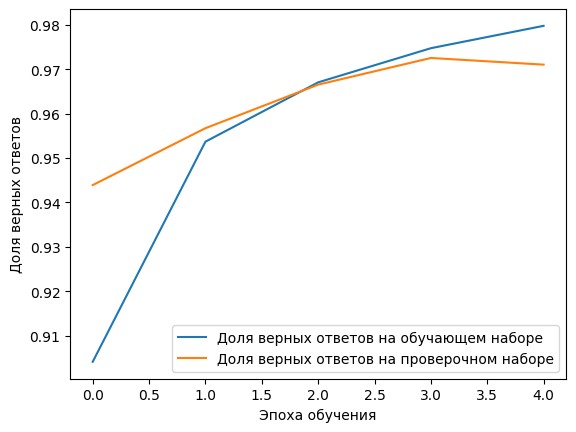

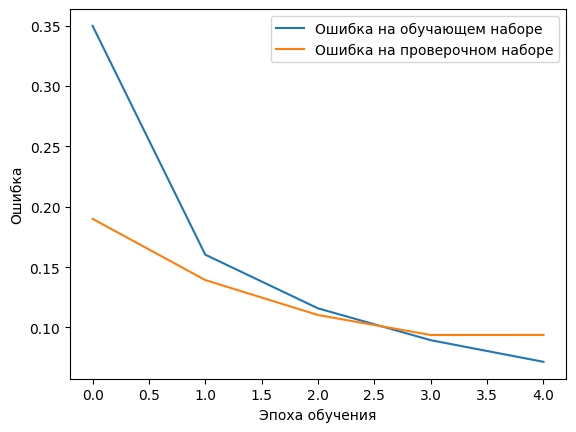

In [ ]:
#Отображаем график точности обучения
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()
# Выводим графики ошибки
plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


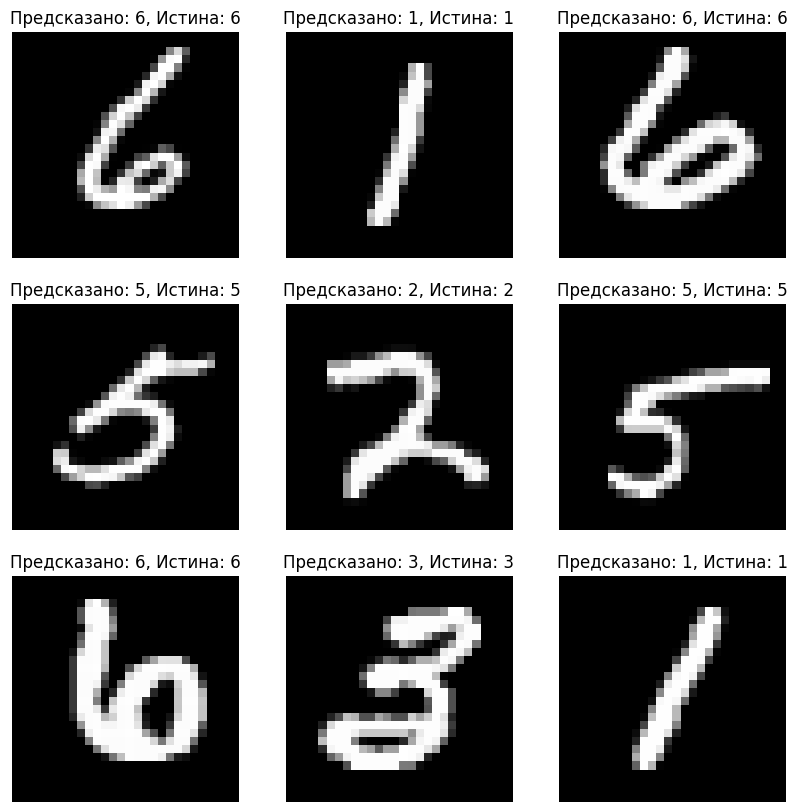

In [ ]:
#Добавить код визуализации результата работы модели для произвольных цифр из набора MNIST
import random
predictions = model2.predict(x_test)
plt.figure(figsize=(10, 10))
for i in range(9):
    random_number = random.randint(0, 10000)
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[random_number], cmap='gray')
    predicted_label = np.argmax(predictions[random_number])
    true_label = y_test[random_number]
    plt.title(f"Предсказано: {predicted_label}, Истина: {true_label}")
    plt.axis('off')
plt.show()

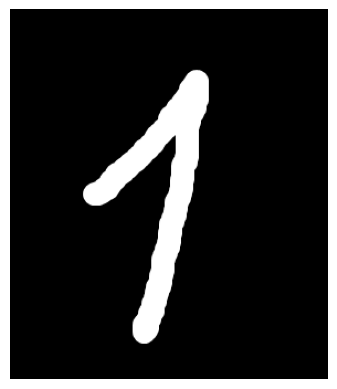

In [ ]:
#попробовать распознать созданную вами рукописную цифру в графическом редакторе
import matplotlib.image as mpimg
# Загружаем изображение
img = mpimg.imread('1.png')
# Отображаем изображение
plt.imshow(img)
plt.axis('off')  # Скрыть оси
plt.show()

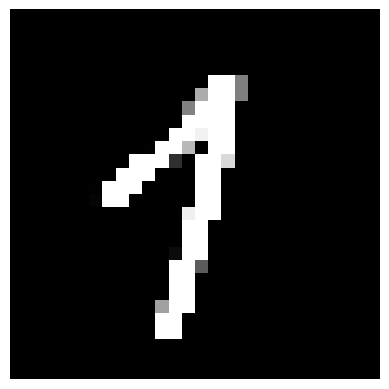

In [ ]:
import cv2
# Загрузка изображения в GRAYSCALE
image = cv2.imread('1.png', cv2.IMREAD_GRAYSCALE)
# Изменили размер до 28 на 28
scaled_image = cv2.resize(image, (28, 28))
# Вывод изображения
plt.imshow(scaled_image, cmap='gray')
plt.axis('off') # Скрыть оси
plt.show()

In [ ]:
# Нормализация данных
scaled_image = scaled_image / 255.0
# Делаем массив из одного примера
scaled_image = np.expand_dims(scaled_image, axis=0)
print(scaled_image.shape)
my_prediction = model2.predict(scaled_image)
print(my_prediction)
# Получаем индекс самого большого элемента (это итоговая цифра, которую распознала сеть)
pred = np.argmax(my_prediction)
print("Предсказано: ", pred)

(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
[[1.8191333e-05 8.8625824e-01 1.4469264e-03 1.3311730e-02 1.5812963e-02
  7.0919858e-05 6.0330299e-06 2.0611776e-02 1.5817503e-02 4.6645705e-02]]
Предсказано:  1


Сжатый код

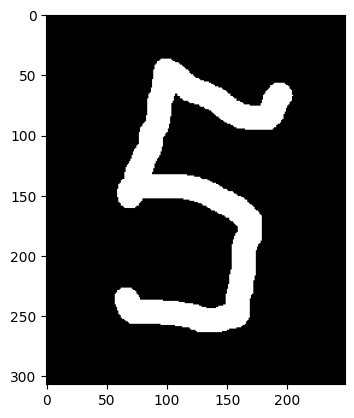

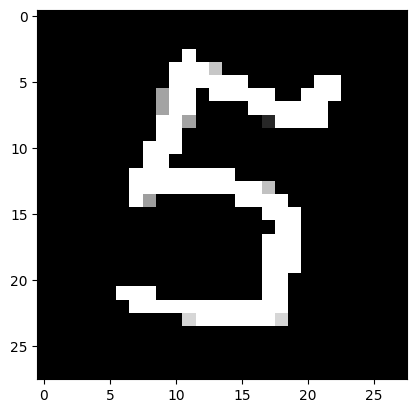

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Предсказано: 5


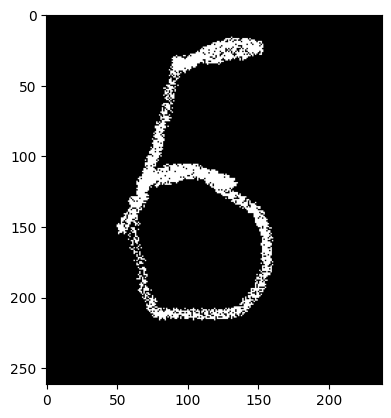

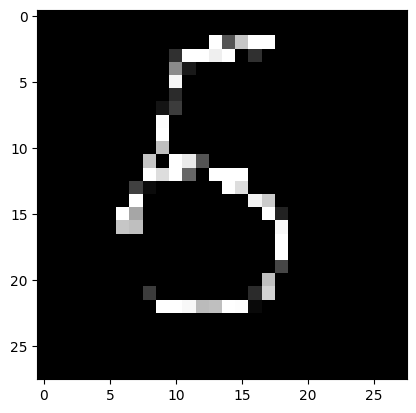

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Предсказано: 6


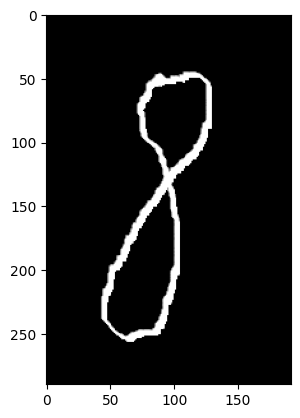

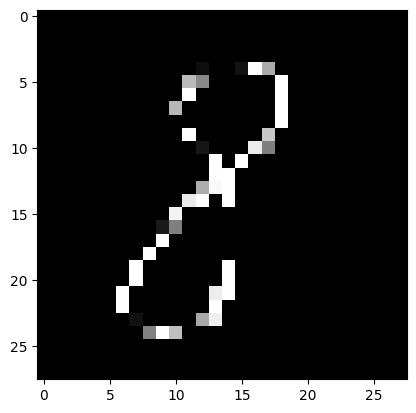

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Предсказано: 3


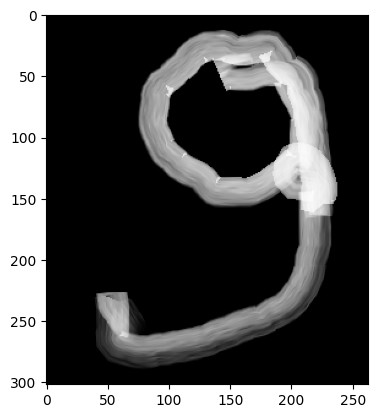

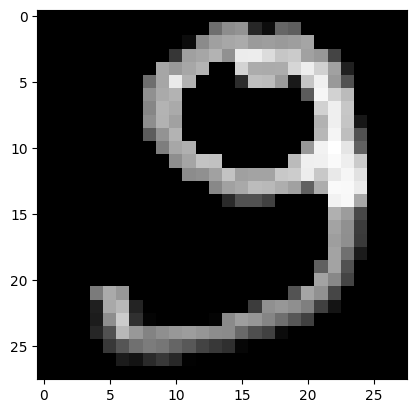

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Предсказано: 3


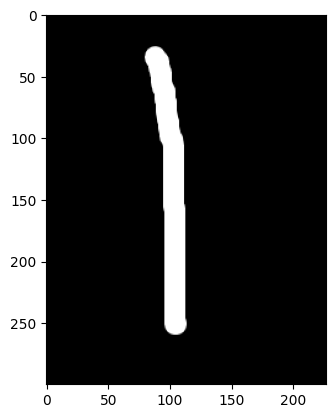

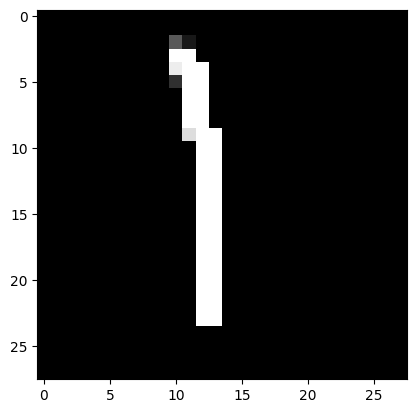

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Предсказано: 8


In [ ]:
def fun(name):
    plt.imshow(mpimg.imread(name))
    plt.show()
    scaled_image = cv2.resize(cv2.imread(name, cv2.IMREAD_GRAYSCALE), (28, 28)) / 255.0
    plt.imshow(scaled_image, cmap='gray')
    plt.show()
    pred = np.argmax(model2.predict(np.expand_dims(scaled_image, axis=0)))
    print("Предсказано:", pred)
fun("5.png")
fun("6.png")
fun("8.png")
fun("9.png")
fun("stick.png")